In [1]:
from enyo.etc import source
from matplotlib import pyplot
import numpy

In [2]:
seeing = source.OnSkyGaussian(20, sampling=1, size=100)

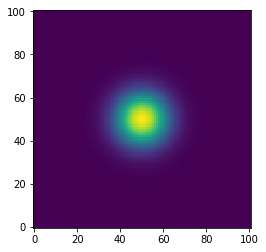

In [3]:
pyplot.imshow(seeing.data, origin='lower', interpolation='nearest')

In [4]:
numpy.sum(seeing.data)

0.9999999946156561

In [5]:
galaxy = source.OnSkySersic(1.0, 50, 1, ellipticity=0.5, position_angle=45, 
                            unity_integral=True, sampling=1, size=1000)

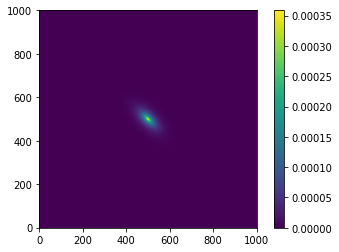

In [6]:
pyplot.imshow(galaxy.data, origin='lower', interpolation='nearest')
pyplot.colorbar()

In [7]:
numpy.sum(galaxy.data)

1.0000038484233815

In [8]:
onsky = source.OnSkySource(seeing, galaxy, sampling=1, size=1000)

In [9]:
tmp = numpy.concatenate((onsky.data.ravel(), onsky.seeing.data.ravel(),
                         onsky.intrinsic.data.ravel()))
vmin = numpy.amin(tmp)
vmax = numpy.amax(tmp)/10

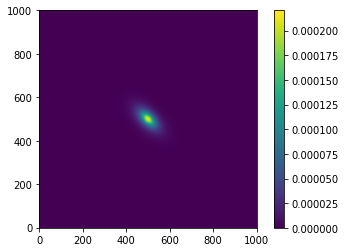

In [10]:
pyplot.imshow(onsky.data, origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
pyplot.colorbar()

In [11]:
numpy.sum(onsky.data)

1.0000038476274733

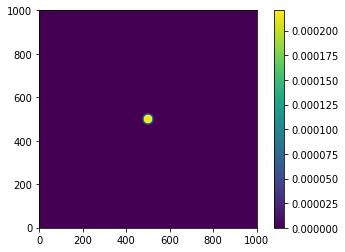

In [12]:
pyplot.imshow(onsky.seeing.data, origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
pyplot.colorbar()

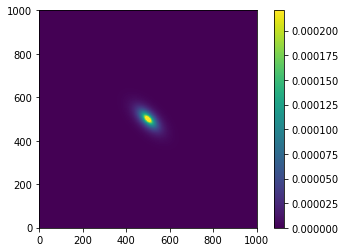

In [13]:
pyplot.imshow(onsky.intrinsic.data, origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
pyplot.colorbar()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


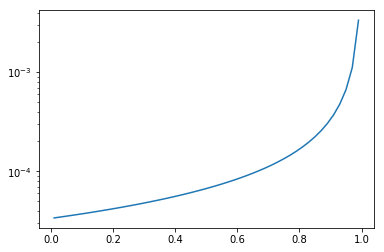

In [19]:
ellip = numpy.linspace(0.01,0.99,50)
amp = numpy.empty_like(ellip, dtype=float)
tot = numpy.empty_like(ellip, dtype=float)
for i,e in enumerate(ellip):
    galaxy = source.OnSkySersic(1.0, 50, 1, ellipticity=e, position_angle=45, 
                                unity_integral=True)
    amp[i] = galaxy.amplitude.value
    tot[i] = galaxy.integral
print(tot)
pyplot.plot(ellip, amp)
pyplot.yscale('log')